# CAPSTONE 3. Predicting Next Cryptocyrrency Market Cycle Peak.
## Exploratory Data Analysis
In this notebook we will perform Exploratory Data Analysis. The goal of this notebook is to take a closer look at our data and see if we can extract any insights from it. The questions we would like to answer by the end of this notebook are:<br>
<ul><i>What is the biggest token in terms of total market capitalization?<br>
    What is the biggest token in terms of trading volume?<br>
    What token has the highest price?<br>
    What token shows the highest ROI?<br>
    Is there any intercorrelation between tokens' prices?<br>
    What are the summary statistics for each coin and for all coins combined?<br>
    What features are correlated with each other?<br>
    What is the nature of this correlation?</i><br>
</ul>
This is not a complete list by any means. During our analysis we will come up with some other quiestions and we will answer them right away. <br>
Let's start.

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#setting default figure size
sns.set(rc={"figure.figsize":(12, 6)})

sns.set_style('whitegrid')

#showing only 2 decimals for floats
pd.options.display.float_format = "{:.3f}".format

In [2]:
df = pd.read_csv('../DW/Data_for_EDA_1.csv')

In [3]:
df.tail()

,Date,price_BTC,market_cap_BTC,total_volume_BTC,price_ETH,market_cap_ETH,total_volume_ETH,price_XRP,market_cap_XRP,total_volume_XRP,price_LTC,market_cap_LTC,total_volume_LTC
1989,2021-01-22 00:00:00 UTC,30913.696,575205510268.129,69415314297.666,1122.912,130713677392.500,49658518028.423,0.269,12251471331.287,3432332258.477,130.158,8633410602.200,7625683734.379
1990,2021-01-23 00:00:00 UTC,32957.909,613271077002.479,69549742252.370,1236.683,140271927461.833,48657448380.086,0.273,12348108563.326,3735006905.771,137.948,9151084592.532,7893968098.531
1991,2021-01-24 00:00:00 UTC,32068.087,596744391345.353,43575409684.641,1231.176,140773242456.761,30774910632.149,0.271,12353173876.274,2366507204.238,137.738,9138226063.308,5145553639.445
1992,2021-01-25 00:00:00 UTC,32273.517,600595408892.199,42810544126.178,1392.540,158167202909.142,39913977039.259,0.274,12456245392.655,1991913877.875,141.742,9404888749.824,4928310878.975
1993,2021-01-26 00:00:00 UTC,32375.320,602517850752.031,50410553261.414,1323.430,151940348541.692,44124188232.248,0.269,12239551031.522,2148246353.086,137.358,9114575939.485,5693649552.456


This is the general overview of our data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1994 non-null   object 
 1   price_BTC         1994 non-null   float64
 2   market_cap_BTC    1994 non-null   float64
 3   total_volume_BTC  1994 non-null   float64
 4   price_ETH         1994 non-null   float64
 5   market_cap_ETH    1994 non-null   float64
 6   total_volume_ETH  1994 non-null   float64
 7   price_XRP         1994 non-null   float64
 8   market_cap_XRP    1994 non-null   float64
 9   total_volume_XRP  1994 non-null   float64
 10  price_LTC         1994 non-null   float64
 11  market_cap_LTC    1994 non-null   float64
 12  total_volume_LTC  1994 non-null   float64
dtypes: float64(12), object(1)
memory usage: 202.6+ KB


As we know from the Data Wrangling step, we don't have any missing values, out dates are Datetime objetcs and are numbers are floats. Now, let's see the period our data spans for and take a look at the summary statistics for each of the tokens.

In [5]:
print(df['Date'].min())
print(df['Date'].max())

2015-08-07 00:00:00 UTC
2021-01-26 00:00:00 UTC


The earliest observation we have was made on August 7, 2015. The latest one was made on January 26, 2021.

In [6]:
#creating a list of column names for each tokens
BTC_cols = [col for col in df.columns if '_BTC' in col]
ETH_cols = [col for col in df.columns if '_ETH' in col]
XRP_cols = [col for col in df.columns if '_XRP' in col]
LTC_cols = [col for col in df.columns if '_LTC' in col]
cols = [BTC_cols, ETH_cols, XRP_cols, LTC_cols]

In [7]:
#printing summary statistics for each token
for column in cols:
    print(df[column].describe())
    print('')

       price_BTC   market_cap_BTC  total_volume_BTC
count   1994.000         1994.000          1994.000
mean    6072.732 107619161714.193   11513196397.037
std     5820.071 106782001948.199   15550816339.984
min      210.094   3053595830.271      20288320.821
25%      788.550  12656373140.260     981533374.989
50%     6056.920 104077447650.765    3298513956.330
75%     9135.111 162538027270.722   20299570310.852
max    40815.962 758971014787.360  178894068361.353

       price_ETH   market_cap_ETH  total_volume_ETH
count   1994.000         1994.000          1994.000
mean     234.440  24242560246.861    4743715297.449
std      253.743  26318926790.791    7897488100.139
min        0.433            0.000         87074.800
25%       12.741   1059709926.336      23429482.417
50%      181.469  19370300447.945    1323690496.920
75%      313.741  31053322641.186    7747471040.721
max     1448.180 158167202909.142  140906534190.588

       price_XRP   market_cap_XRP  total_volume_XRP
count   19

We can see from the statistics above that 'total_volume' and 'market_cap' are quite huge. To make it easier for observing we will convert volume values to be shown <b>in millions</b> and market_cap to be shown <b>in billions</b>

In [8]:
#creating lists of total_volume columns and market_cap columns
vol_cols = [col for col in df.columns if 'total_volume_' in col]
mc_cols = [col for col in df.columns if 'market_cap_' in col]

#dividing total volume(market cap) by one million(one billion) to get volume(market cap) in millions(billions)
df[vol_cols] = df[vol_cols] / 1000000
df[mc_cols] = df[mc_cols] / 1000000000

In [9]:
df.head(3)

,Date,price_BTC,market_cap_BTC,total_volume_BTC,price_ETH,market_cap_ETH,total_volume_ETH,price_XRP,market_cap_XRP,total_volume_XRP,price_LTC,market_cap_LTC,total_volume_LTC
0,2015-08-07 00:00:00 UTC,278.509,4.016,47.637,2.832,0.000,0.091,0.008,0.260,0.361,4.185,0.172,90.333
1,2015-08-08 00:00:00 UTC,259.801,3.746,80.056,1.331,0.080,0.368,0.008,0.270,0.619,3.915,0.161,78.223
2,2015-08-10 00:00:00 UTC,263.578,3.817,60.783,0.688,0.042,0.400,0.009,0.279,0.468,3.935,0.164,66.829


Let's also remove time fom our date column.

In [10]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [11]:
df.head(3)

,Date,price_BTC,market_cap_BTC,total_volume_BTC,price_ETH,market_cap_ETH,total_volume_ETH,price_XRP,market_cap_XRP,total_volume_XRP,price_LTC,market_cap_LTC,total_volume_LTC
0,2015-08-07,278.509,4.016,47.637,2.832,0.000,0.091,0.008,0.260,0.361,4.185,0.172,90.333
1,2015-08-08,259.801,3.746,80.056,1.331,0.080,0.368,0.008,0.270,0.619,3.915,0.161,78.223
2,2015-08-10,263.578,3.817,60.783,0.688,0.042,0.400,0.009,0.279,0.468,3.935,0.164,66.829


Great. Now it's much easier to see the date, trading volume and market capitalization of each token. Now we have all the data needed to proceed. Let's plot our currencies market caps.

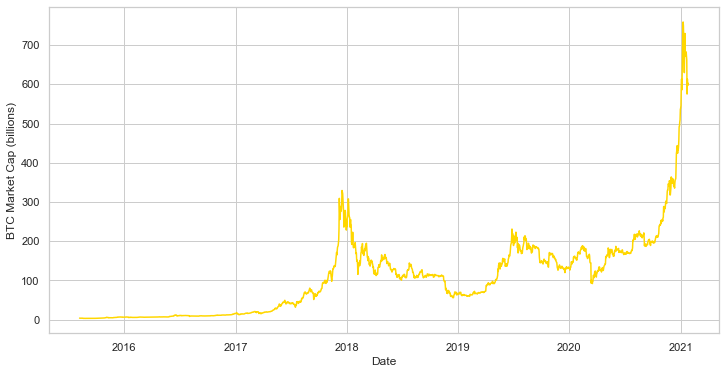

In [22]:
fig = sns.lineplot(data=df, x='Date', y='market_cap_BTC', color='gold')
fig.set(xlabel='Date', ylabel='BTC Market Cap (billions)');

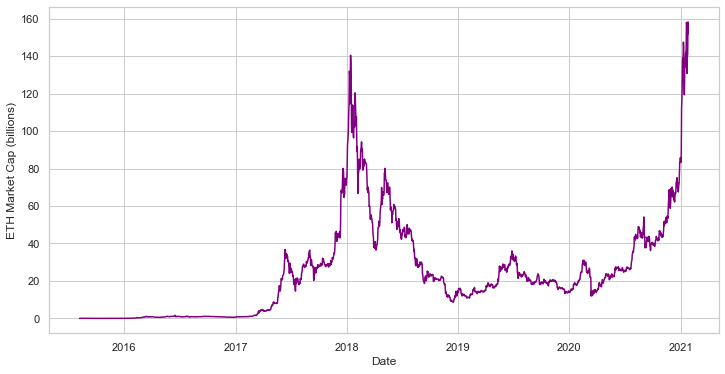

In [27]:
fig = sns.lineplot(data=df, x='Date', y='market_cap_ETH', color='purple')
fig.set(xlabel='Date', ylabel='ETH Market Cap (billions)');

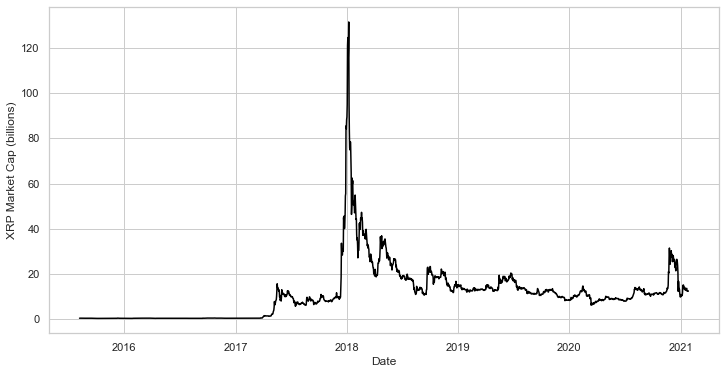

In [28]:
fig = sns.lineplot(data=df, x='Date', y='market_cap_XRP', color='black')
fig.set(xlabel='Date', ylabel='XRP Market Cap (billions)');

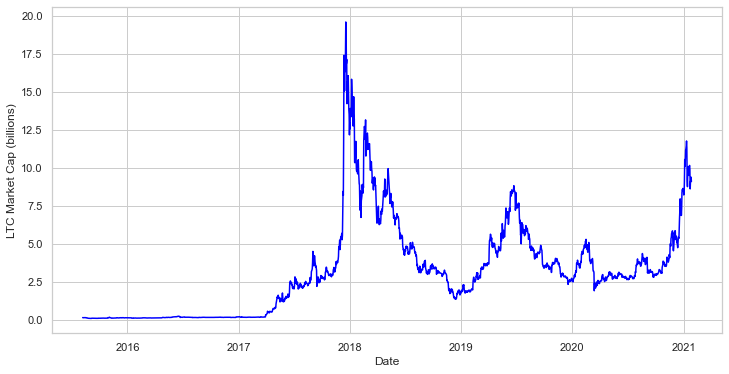

In [29]:
fig = sns.lineplot(data=df, x='Date', y='market_cap_LTC', color='blue')
fig.set(xlabel='Date', ylabel='LTC Market Cap (billions)');

As we can see, Bitcoin is by far the biggest token in terms of market capitalization. It makes sense considering the fact it's the oldest crytocurrency there is. Interestingly enough, we can see significant spike in market cap by the end of 2020 for BTC, ETH and LTC. XRP, however, does not show such spike. Why? We should look for the news about XRP and easily find an answer there: <br>
On December 22, 2020, The Securities and Exchange Commission announced that it has filed an action against Ripple Labs Inc (company that created XRP) and two of its executives alleging that they raised over $1.3 billion through an unregistered, ongoing digital asset securities offering. <br>
No wonder people are not too eager to buy XRP now.